# BPS Bus Route Optimization

Initial Setup of Pacakges and Interface

In [40]:
from __future__ import print_function

import matplotlib.pyplot as plt
import matplotlib.cm
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize

import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn import metrics
import sklearn as sk

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

Load the data in

In [41]:
df = pd.read_csv('/Users/tylershannon/Desktop/BPS-Transportation/StudentInformation/BPS-StudentInformation.csv')

Display data

In [61]:
df.head()

,StreetNum,StreetName,ZipCode,Lat,Long,PickupType,Grade,Geocode,NeighborhoodSafetyScore,MaxWalk,AssignedSchool,CurrentSchoolStart,CurrentSchoolEnd,SchoolAddress,SchoolLat,SchoolLong,StopFlex
0,1,CLAREMONT PK,2118,42.342049,-71.080765,Corner,3,25025070800,3,0.5,Johnny Pesky School,8:30:00 AM,4:00:00 PM,"236 Beech St, 02131",42.281233,-71.141075,0.5
1,1,DUNFORD ST,2119,42.317420,-71.094550,Corner,1,25025081500,5,0.4,Tris Speaker School,7:30:00 AM,2:10:00 PM,"40 Pershing Rd, 02130",42.318999,-71.114084,0.4
2,1,ORGAN PARK ST,2131,42.288240,-71.113130,D2D,6,25025110301,4,0.5,John Gorman School,8:30:00 AM,4:00:00 PM,"110 Beachview Rd, 02128",42.391629,-71.005053,0.0
3,2295,CENTRE ST,2132,42.271750,-71.161770,Corner,1,25025130402,2,0.4,Roger Clemens School,7:30:00 AM,3:00:00 PM,"200 Heath St, 02130",42.326009,-71.106552,0.4
4,1,WESTINGHOUSE PZ,2136,42.359400,-71.058700,D2D,4,25025030300,7,0.3,Joe Dobson School,8:30:00 AM,4:00:00 PM,"61 School St, 02119",42.313946,-71.097867,0.0


Create dataframe of schools and their locations (constrained to unique instances)

In [82]:
SchoolLoc = pd.DataFrame(df.AssignedSchool.unique())
SchoolLoc['SchoolLat'] = df.SchoolLat
SchoolLoc['SchoolLong'] = df.SchoolLong

Make new feature for flexability of stop location based on type of bus stop

In [83]:
df['StopFlex'] = 0.0

for i in range(len(df.PickupType)):
    if df.PickupType[i] == 'Corner':
        df.StopFlex[i] = df.MaxWalk[i]

df.head()

,StreetNum,StreetName,ZipCode,Lat,Long,PickupType,Grade,Geocode,NeighborhoodSafetyScore,MaxWalk,AssignedSchool,CurrentSchoolStart,CurrentSchoolEnd,SchoolAddress,SchoolLat,SchoolLong,StopFlex
0,1,CLAREMONT PK,2118,42.342049,-71.080765,Corner,3,25025070800,3,0.5,Johnny Pesky School,8:30:00 AM,4:00:00 PM,"236 Beech St, 02131",42.281233,-71.141075,0.5
1,1,DUNFORD ST,2119,42.317420,-71.094550,Corner,1,25025081500,5,0.4,Tris Speaker School,7:30:00 AM,2:10:00 PM,"40 Pershing Rd, 02130",42.318999,-71.114084,0.4
2,1,ORGAN PARK ST,2131,42.288240,-71.113130,D2D,6,25025110301,4,0.5,John Gorman School,8:30:00 AM,4:00:00 PM,"110 Beachview Rd, 02128",42.391629,-71.005053,0.0
3,2295,CENTRE ST,2132,42.271750,-71.161770,Corner,1,25025130402,2,0.4,Roger Clemens School,7:30:00 AM,3:00:00 PM,"200 Heath St, 02130",42.326009,-71.106552,0.4
4,1,WESTINGHOUSE PZ,2136,42.359400,-71.058700,D2D,4,25025030300,7,0.3,Joe Dobson School,8:30:00 AM,4:00:00 PM,"61 School St, 02119",42.313946,-71.097867,0.0


Create Data Frame for School Testing

# Visualizing Data - Create Map

Resize figures

In [45]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 20

Crete Basemap instance

In [77]:
m = Basemap(resolution='f', #c, l, i, h, f, or None
           projection='merc',
           lat_0=42.321827, lon_0=-71.081543,
           llcrnrlon=-71.198616, llcrnrlat=42.227755, urcrnrlon=-70.941811, urcrnrlat=42.403939)

In [96]:
if df.AssignedSchool.any == 'Johnny Pesky School':
    print('Hello')

Define Map features

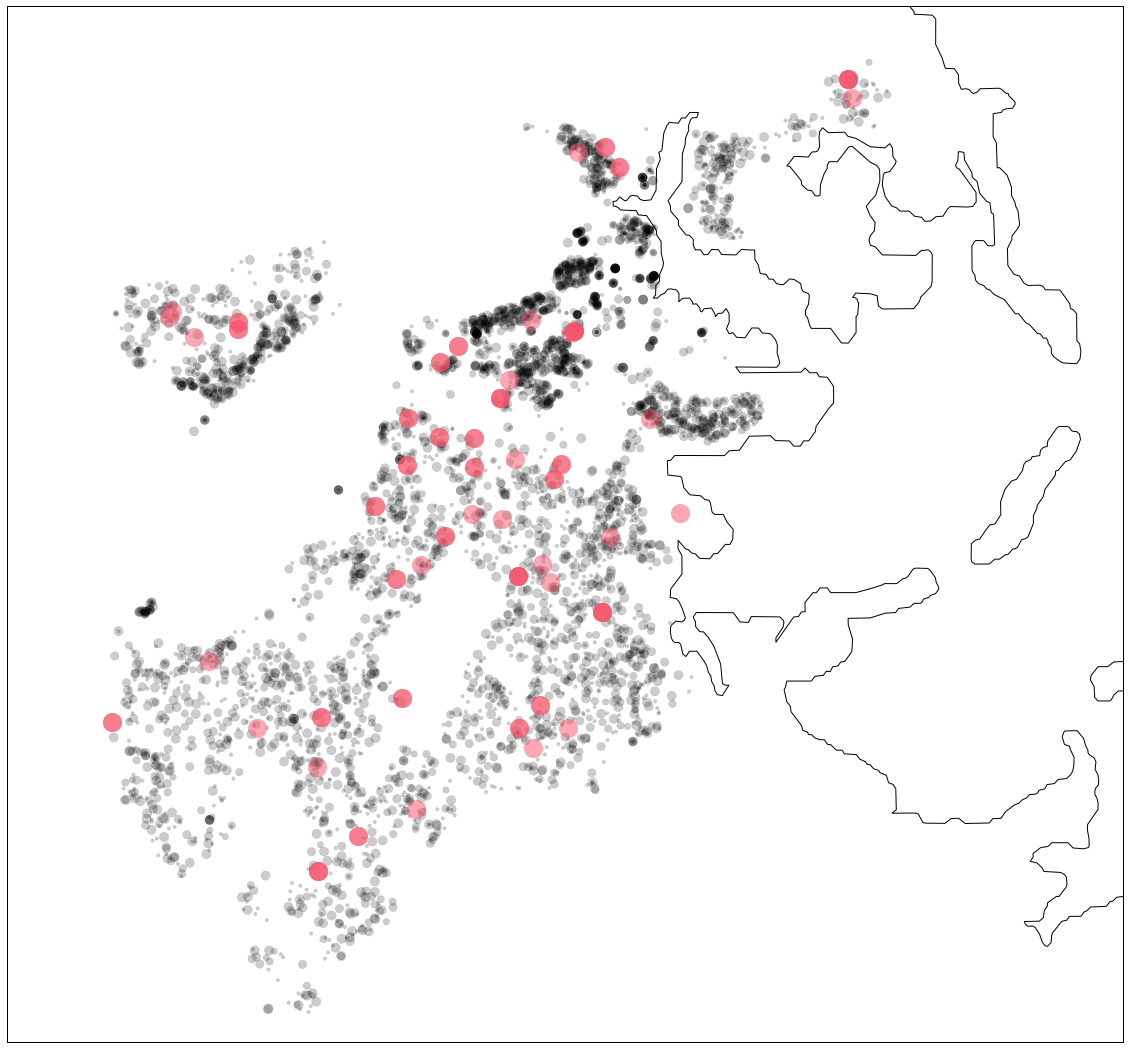

In [102]:
m.drawmapboundary(fill_color='#ffffff')
m.fillcontinents(color='#ffffff', lake_color='#ffffff', alpha=0)
m.drawcoastlines()

stoplons = df.Long
stoplats = df.Lat

schoollons = SchoolLoc.SchoolLong
schoollats = SchoolLoc.SchoolLat

stopx, stopy = m(list(stoplons), list(stoplats))
schoolx, schooly = m(list(schoollons), list(schoollats))

size = df.StopFlex * 600 + 50

m.scatter(stopx, stopy, marker='.', s = size, color = 'k', alpha = .2)
m.scatter(schoolx, schooly, marker = 'o', s = 350, c = '#F6546A', alpha=0.5)
#m.readshapefile('/Users/tylershannon/Desktop/bos_land/bos_land', 'bosshape')


# Visualize Johnny Pesky School

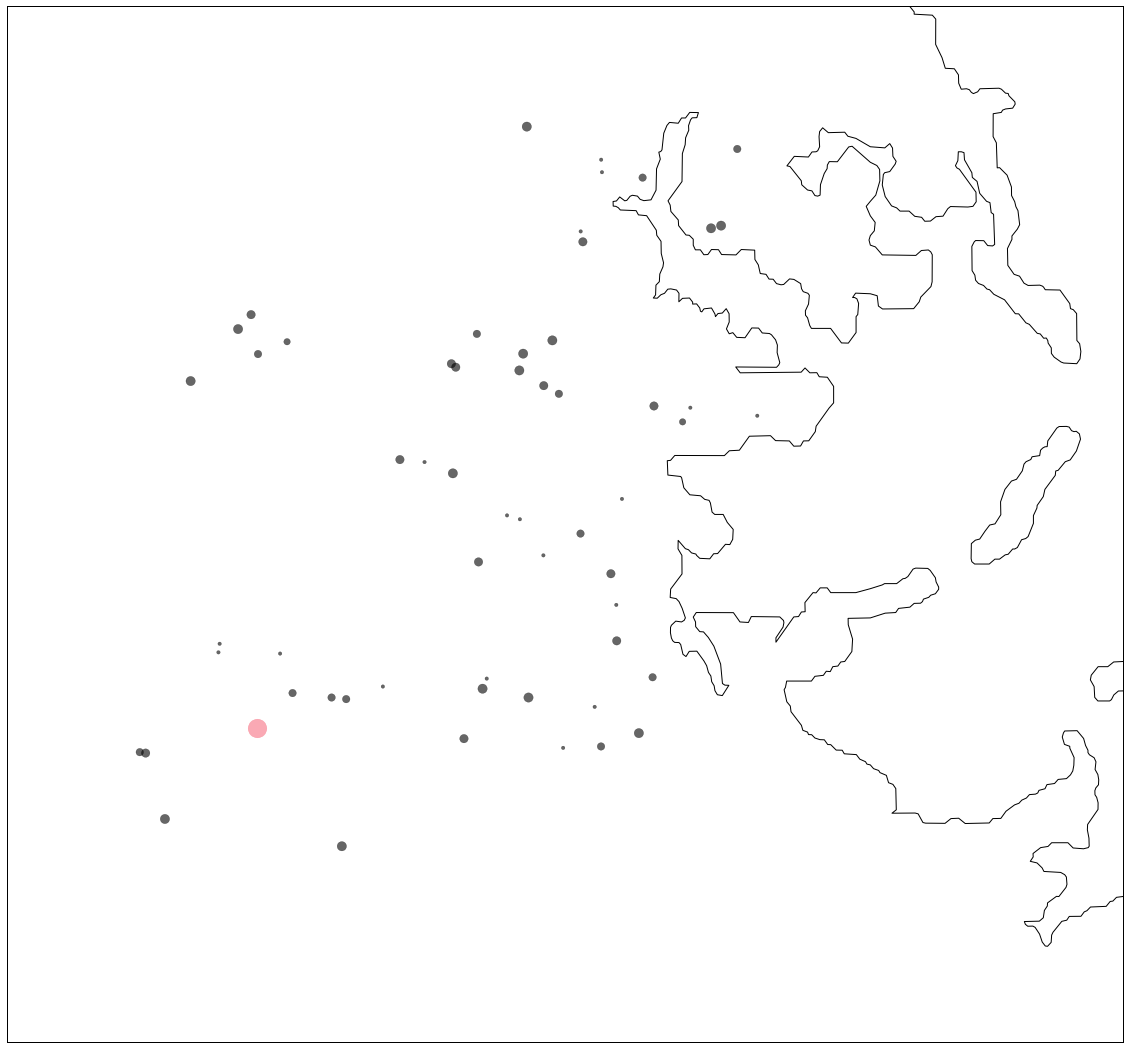

In [110]:
m.drawmapboundary(fill_color='#ffffff')
m.fillcontinents(color='#ffffff', lake_color='#ffffff', alpha=0)
m.drawcoastlines()

SchoolsToShow = 'Johnny Pesky School'

stoplons = df.loc[df['AssignedSchool'] == 'Johnny Pesky School'].Long
stoplats = df.loc[df['AssignedSchool'] == 'Johnny Pesky School'].Lat

schoollons = SchoolLoc.loc[df['AssignedSchool'] == 'Johnny Pesky School'].SchoolLong
schoollats = SchoolLoc.loc[df['AssignedSchool'] == 'Johnny Pesky School'].SchoolLat

stopx, stopy = m(list(stoplons), list(stoplats))
schoolx, schooly = m(list(schoollons), list(schoollats))

size = df.StopFlex * 600 + 50

m.scatter(stopx, stopy, marker='.', s = size, color = 'k', alpha = .6)
m.scatter(schoolx, schooly, marker = 'o', s = 350, c = '#F6546A', alpha=0.5)
#m.readshapefile('/Users/tylershannon/Desktop/bos_land/bos_land', 'bosshape')